# Determine parameters of Celcius-Fahrenheit converting formula

# Answer

\begin{align}
F = \frac{9}{5} C + 32
\end{align}

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

## Generating data with randomness

In [2]:
xs = np.arange(-5, 15, 0.05)
ys = np.array([x*9/5+32 + random.gauss(0,3) for x in xs])

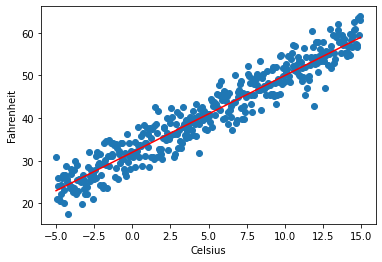

In [3]:
ys_ideal = np.array([x*9/5+32 for x in xs])
plt.scatter(xs,ys)
plt.plot(xs,ys_ideal, color='red')
plt.xlabel('Celsius')
plt.ylabel('Fahrenheit')
plt.show()

Consider $\mathop{\rm arg~max}\limits_{\alpha,\beta} \sum_{j=1}^N (y_j - t_j)^2$, where $y_j = \alpha x_j + \beta$.
\begin{align}
\frac{\partial}{\partial \alpha} \sum_{j=1}^N (y_j - t_j)^2 &= \sum_{j=1}^N 2x_j(\alpha x_j + \beta - t_j) = 2\Big( \left(\sum x_j^2\right) \alpha + \left(\sum x_j\right) \beta - \sum x_j t_j \Big), \\
\frac{\partial}{\partial \beta} \sum_{j=1}^N (y_j - t_j)^2 &= \sum_{j=1}^N 2(\alpha x_j + \beta - t_j) = 2\Big( \left(\sum x_j\right) \alpha + N \beta - \sum t_j \Big).
\end{align}

Solving the normal equation, we get $\alpha = \frac{\sum (x_j -\bar{x})(t_j - \bar{t})}{\sum(x_j - \bar{x})^2},\ \beta = \bar{t} - \alpha \bar{x}$, where $\bar{x} = \frac{1}{N}\sum x_j,\ \bar{t} = \frac{1}{N}\sum t_j$

## Verification 1 - Direct Calculation

In [4]:
xs_mean = np.mean(xs)
ys_mean = np.mean(ys)
alpha = np.sum((xs - xs_mean)*(ys - ys_mean))/np.sum((xs - xs_mean)**2)
beta = ys_mean - alpha * xs_mean

print('estimate:', alpha, beta)
print('ideal:', 9/5, 32)

estimate: 1.8215084258189564 32.05213768082538
ideal: 1.8 32


## Verification 2 - using scikit-learn

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
model_lr = LinearRegression()
model_lr.fit(xs.reshape(-1,1), ys.reshape(-1,1))
coef, intercept = model_lr.coef_[0][0], model_lr.intercept_[0]

print('estimate:', coef, intercept)
print('ideal:', 9/5, 32)

estimate: 1.821508425818957 32.05213768082538
ideal: 1.8 32


## Verification 3 - using TensorFlow

In [7]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models

In [8]:
# https://www.tensorflow.org/tutorials/load_data/numpy
train_dataset = tf.data.Dataset.from_tensor_slices((xs, ys))
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)

In [9]:
for x, y in train_dataset:
    print(float(x[0]), float(y[0]))
    print(float(x[1]), float(y[1]))
    print(float(x[2]), float(y[2]))
    break

-4.350000000000002 28.821372080691226
-3.550000000000005 23.03081919833488
-4.450000000000002 23.25605335318977


In [10]:
model = models.Sequential()
model.add(layers.Dense(1, input_shape=(1,)))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='sgd', loss='mean_squared_error')

In [12]:
history = model.fit(train_dataset, batch_size=BATCH_SIZE, epochs=100, verbose=0)

In [13]:
[loss for i, loss in enumerate(history.history['loss']) if i%5==0]

[795.586181640625,
 309.0827331542969,
 149.78033447265625,
 77.96508026123047,
 39.13333511352539,
 24.364225387573242,
 23.759767532348633,
 14.099495887756348,
 11.991227149963379,
 10.624961853027344,
 10.888957977294922,
 9.428252220153809,
 9.374397277832031,
 9.403416633605957,
 9.400552749633789,
 11.363994598388672,
 11.112797737121582,
 9.299749374389648,
 9.892905235290527,
 10.148444175720215]

In [14]:
coef, intercept = float(model.layers[0].weights[0]), float(model.layers[0].bias[0])

print('estimate:', coef, intercept)
print('ideal:', 9/5, 32)

estimate: 1.7040822505950928 32.012107849121094
ideal: 1.8 32
